### Dependencies

In [5]:
#!pip install tensorflow

In [6]:
import pandas as pd
import numpy as np
import sys
import warnings

# Regex
import re

# NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# TextBlob
from textblob import TextBlob

#import tensorflow as tf
#from tensorflow.keras import datasets, preprocessing, models, layers,regularizers
#print(tf.__version__)

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [7]:
# Import

In [8]:
music_df = pd.read_csv("../api/data/lyrics_etl.csv")
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,3a2jFwnts4Cf0OwJbK61SL,Gospel (with Eminem),2022-02-21T00:00:25.741Z,"Intro: Eminem &amp; Dr. Dre\nYeah (Yeah, yeah,..."
1,1,6pcywuOeGGWeOQzdUyti6k,Glock In My Lap,2022-02-20T23:30:14.416Z,"Intro\nY'all niggas stop playin', nigga\nY'all..."


### Regex Cleaning

In [9]:
def html_cleaner (string):
    html_cleaner = re.sub(r'\n', " ", string)
    return html_cleaner

In [10]:
music_df['lyrics'] = music_df.lyrics.apply(html_cleaner)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,3a2jFwnts4Cf0OwJbK61SL,Gospel (with Eminem),2022-02-21T00:00:25.741Z,"Intro: Eminem &amp; Dr. Dre Yeah (Yeah, yeah, ..."
1,1,6pcywuOeGGWeOQzdUyti6k,Glock In My Lap,2022-02-20T23:30:14.416Z,"Intro Y'all niggas stop playin', nigga Y'all n..."


### Tokenization

In [11]:
# Donwload tokenizer from NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/pierre-
[nltk_data]     macmini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def tokenizer (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [13]:
music_df['lyrics'] = music_df['lyrics'].apply(tokenizer)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,3a2jFwnts4Cf0OwJbK61SL,Gospel (with Eminem),2022-02-21T00:00:25.741Z,"[Intro, Eminem, amp, Dr, Dre, Yeah, Yeah, yeah..."
1,1,6pcywuOeGGWeOQzdUyti6k,Glock In My Lap,2022-02-20T23:30:14.416Z,"[Intro, Y, all, niggas, stop, playin, nigga, Y..."


In [14]:
# Remove comma
music_df['lyrics'] = music_df['lyrics'].apply(lambda x: " ".join(x))
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,3a2jFwnts4Cf0OwJbK61SL,Gospel (with Eminem),2022-02-21T00:00:25.741Z,Intro Eminem amp Dr Dre Yeah Yeah yeah yeah ye...
1,1,6pcywuOeGGWeOQzdUyti6k,Glock In My Lap,2022-02-20T23:30:14.416Z,Intro Y all niggas stop playin nigga Y all nig...


### Stop Words

In [15]:
nltk.download('stopwords') #stopwords

[nltk_data] Downloading package stopwords to /Users/pierre-
[nltk_data]     macmini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'but', 'myself', 'same', 'in', 'needn', "she's", 'been', 'so', 're', "hadn't", 'we', 'only', 'doing', 'himself', "you'd", 'how', 'y', 'theirs', 'mustn', 'at', 'i', 'a', 'didn', 'has', 'aren', 'above', 'shouldn', 'on', "won't", 'weren', 'why', 'are', 'their', 'had', 'do', 'for', 'hers', "isn't", 'while', 'ma', 'other', 't', 'again', 'isn', 'where', 'those', "you've", 'as', 'very', "you'll", 'from', 'should', 'was', "mustn't", "doesn't", 'because', 'there', 'couldn', 'the', 'now', 'yourself', 'down', "should've", 'to', 'they', 'wasn', 'against', 'ours', 'more', 'until', 'itself', 'when', "it's", "hasn't", 'did', "mightn't", 'and', 'below', 'd', 'these', 'hadn', 'yours', 'this', 'through', 'some', 'doesn', 'his', 'our', 'have', 'over', 'having', "shan't", 'them', 'few', 'such', "aren't", 'whom', 'being', 'just', 'not', 'it', 'then', 've', 'can', "haven't", 'any', 'o', 'my', 'will', 'your', 'haven', 'before', 'be', 'with', 'by', 'both', "needn't", 'between', 'her', 'he', 'most', 'than', '

In [17]:
music_df.lyrics = music_df.lyrics.apply(lambda x: x.split(" "))

In [18]:
def stop_words (data):
    stop_words = set(stopwords.words('english'))
    stop_words_list = []
    for string in data:
        if string not in stop_words:
            stop_words_list.append(string)
    return " ".join(stop_words_list)

In [19]:
music_df.lyrics = music_df.lyrics.apply(stop_words)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,3a2jFwnts4Cf0OwJbK61SL,Gospel (with Eminem),2022-02-21T00:00:25.741Z,Intro Eminem amp Dr Dre Yeah Yeah yeah yeah ye...
1,1,6pcywuOeGGWeOQzdUyti6k,Glock In My Lap,2022-02-20T23:30:14.416Z,Intro Y niggas stop playin nigga Y niggas know...


### Sentiment Analysis

In [20]:
my_test = "I love my wife"
blob = TextBlob(my_test)
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /Users/pierre-
[nltk_data]     macmini/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
intAnalyser = SentimentIntensityAnalyzer()
polarity = intAnalyser.polarity_scores(my_test)
polarity

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [23]:
def sentimentScore(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [24]:
music_df['sentiment_compound'] = music_df.lyrics.apply(sentimentScore)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics,sentiment_compound
0,0,3a2jFwnts4Cf0OwJbK61SL,Gospel (with Eminem),2022-02-21T00:00:25.741Z,Intro Eminem amp Dr Dre Yeah Yeah yeah yeah ye...,-0.9833
1,1,6pcywuOeGGWeOQzdUyti6k,Glock In My Lap,2022-02-20T23:30:14.416Z,Intro Y niggas stop playin nigga Y niggas know...,-0.8601


### Visualization

In [25]:
music_df.song_name.value_counts()

Gospel (with Eminem)    1
Glock In My Lap         1
Name: song_name, dtype: int64

In [26]:
music_sent = music_df.groupby(['song_name'])['sentiment_compound'].mean().sort_values()
music_sent

song_name
Gospel (with Eminem)   -0.9833
Glock In My Lap        -0.8601
Name: sentiment_compound, dtype: float64

<AxesSubplot:xlabel='song_name'>

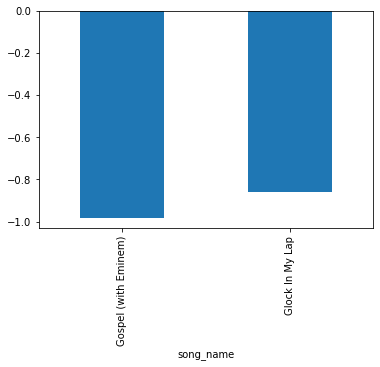

In [27]:
music_sent.plot(kind="bar")